# K-Means

In this lesson we'll learn about the K-Means clustering algorithm.

## K-Means Overview

### At A Glance

- Unsupervised machine learning algorithm
- Groups a dataset into a user-specified number (k) of clusters
- k must be specified ahead of time
- clusters won't have the same number of points

| Pros                                            | Cons                                              |
| ----                                            | ----                                              |
| Fast relative to ther clustering algorithms     | Data should be scaled before clustering           |
| Output cluster centroids are very interpretable | Highly succeptible to the curse of dimensionality |
| Most common clustering algorithm                | Sensitive to outliers                             |

### Algorithm

1. Start with our data: X.
1. Randomly[^1] choose k points in the same space as X. These are called the **centroids**.
1. Calculate the distance from every point in X to each of the centroids.
1. Assign each point in X to the closest centroid.
1. Reposition the centroids such that they are the average of all the points assigned to them.
1. Repeat from step 3 until some condition for stopping[^2] is met.

[^1]: In practice the k points aren't chosen randomly, there are some clever algorithms we can use to best guess where the centers should be. For the sake of demonstration, it doesn't matter whether the points are chosen randomly or not. You can read more about this in the [scikit-learn User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means).

[^2]: Usually this is calculating the change in inertia from one iteration to the next. If the change is less than some tolerance, than we are done.

### Vocabulary

- **centroid**: one of the cluster centers in a K-Means clustering
- **inertia**: sum of the squared distances from each point to it's assigned centroid

## Example with Iris

To demonstrate k-means clustering, we'll use the iris dataset. This dataset is particularly useful for demonstrating clustering algorithms because we know ahead of time there should be 3 clusters, for each of the distinct 3 species.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire
import viz
np.random.seed(4)

iris = acquire.get_iris_data()

In [2]:
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species_id,species_name
0,1.4,0.2,5.1,3.5,1,setosa
1,1.4,0.2,4.9,3.0,1,setosa
2,1.3,0.2,4.7,3.2,1,setosa
3,1.5,0.2,4.6,3.1,1,setosa
4,1.4,0.2,5.0,3.6,1,setosa


We'll pretend that we don't know the species name and species id ahead of time. And, for the sake of simplicity, we'll just use two fields from the dataset.

In [3]:
X = iris[['petal_length', 'sepal_length']]

Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.

In [5]:
iris['cluster'] = kmeans.predict(X)

Let's visualize what our clusters look like:

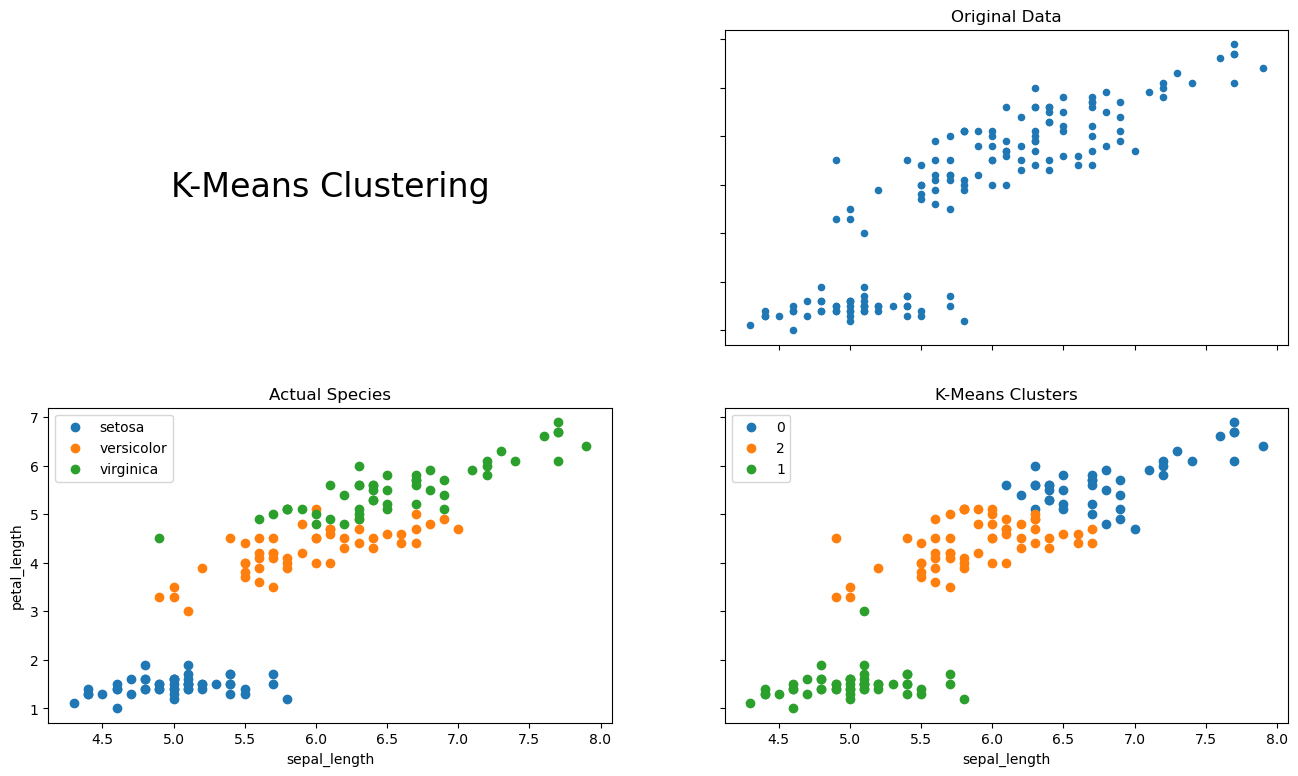

In [6]:
viz.clustering_example1(iris)

### The `kmeans` Object

The K-means object also has a few interesting properties:

- `cluster_centers_`: The center point of each cluster.

- `labels_`: The labels for each observation.

    This is the same as what we obtained from `kmeans.predict(X)` above. The difference is that the `predict` method can be used on unseen data (for example, your test or validate data splits), while the `labels_` property only contains clusters for the data used for fitting.
    
- `intertia_`: The sum of the squared errors from each data point to it's associated cluster.

Let's take a closer look at the cluster centers.

### Cluster Centers

In [7]:
kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

These are the average values of each feature for each cluster. Putting them into a dataframe and labelling them will help illustrate:

In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,sepal_length
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


Note that because of the way that the k-means algorithm works, these are the same numbers we would get from grouping by the cluster number and finding the average values for those features.

In [9]:
iris.groupby('cluster')[['petal_length', 'sepal_length']].mean()

,petal_length,sepal_length
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


Keep in mind these cluster centers are **not** data points from the dataset itself; they are the calculated average value for each group.

Let's visualize the cluster centers on top of our data too:

Text(0.5, 1.0, 'Visualizing Cluster Centers')

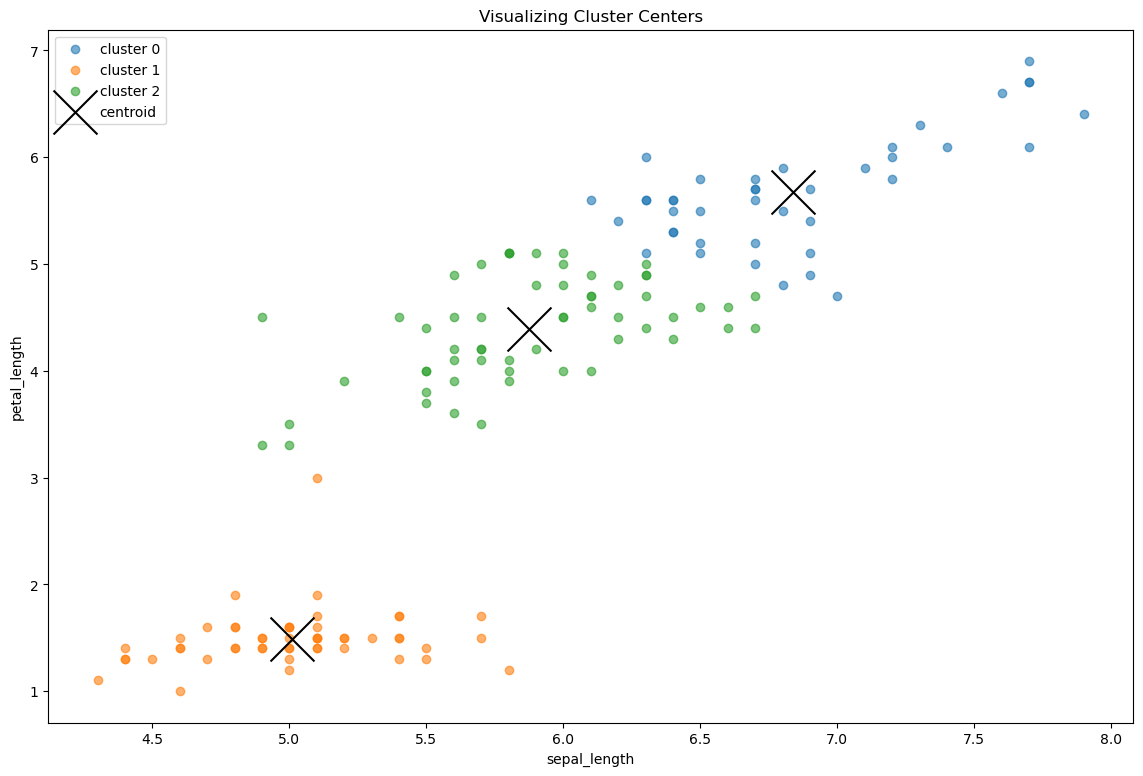

In [10]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

### Exploring Different Values of k

Let's see what happens when we use a number of clusters that is less than optimal.

First we'll see what happens with 2 clusters:

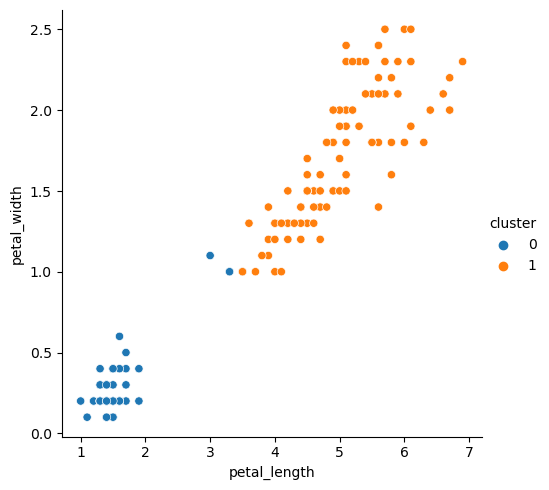

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

And now let's see what happens when we use a larger number.

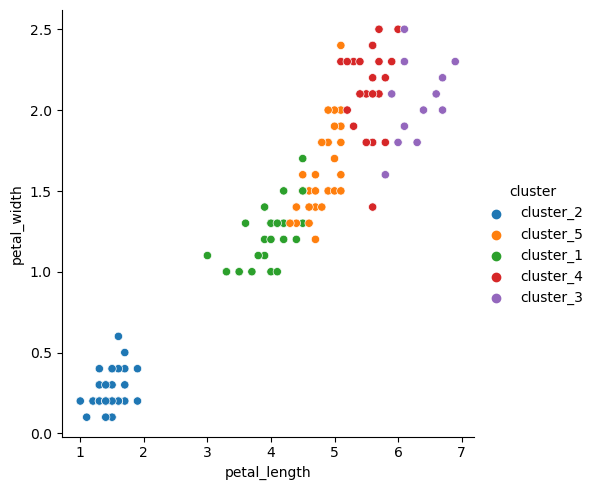

In [12]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

## Choosing k with Inertia

Within the context of k-means clustering, inertia is the sum of squared distances from each point to it's assigned centroid. We can use this quantity to help us determine a good value for k.

We cannot simply choose a number of clusters that minimizes inertia, because inertia will always decrease as we increase the number of clusters.
Consider the case where the number of clusters is equal to the number of data points: the inertia will be 0, but our clusters don't provide any value.

One way to choose the ideal number of clusters using inertia is the **elbow method**. To use the elbow method, we'll visualize the inertia against our choice in number of clusters. In this visualization, we'll look for the "elbow" of the curve, or the point where adding additional clusters doesn't give us as big of a reduction in inertia.

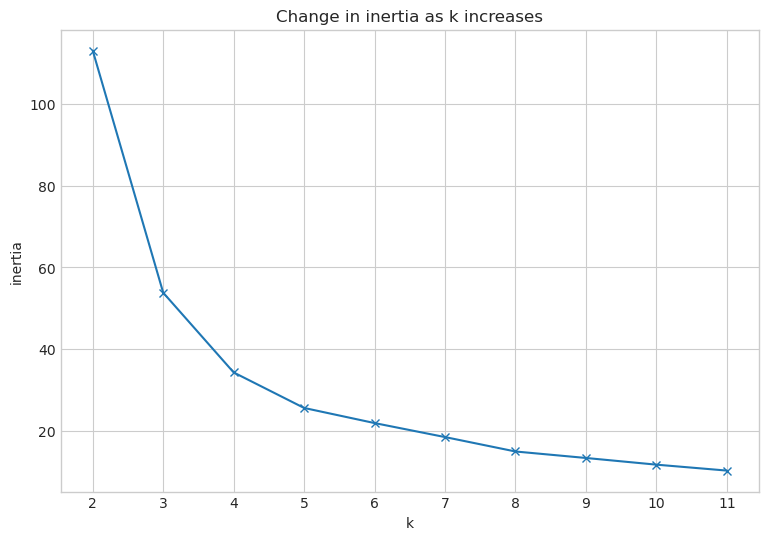

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In the chart above, we notice that the reduction in inertia drops off after about 4 clusters. Based on the above visualization, we might conclude that the optimal number of clusters is 4.

In addition to the elbow method, it is always helpful to visualize our clusters.

A common way to do this is to use color to indicate which cluster each data point is in.[^3]

[^3]: In our example, we created the clusters based only on 2 dimensions, so visualizing the results of our clustering is relatively easy. In practice, clusters might be based on many more than 2 dimensions. In this case, we could various combinations of 2 dimensions that the clustering was based on and visualize the results.

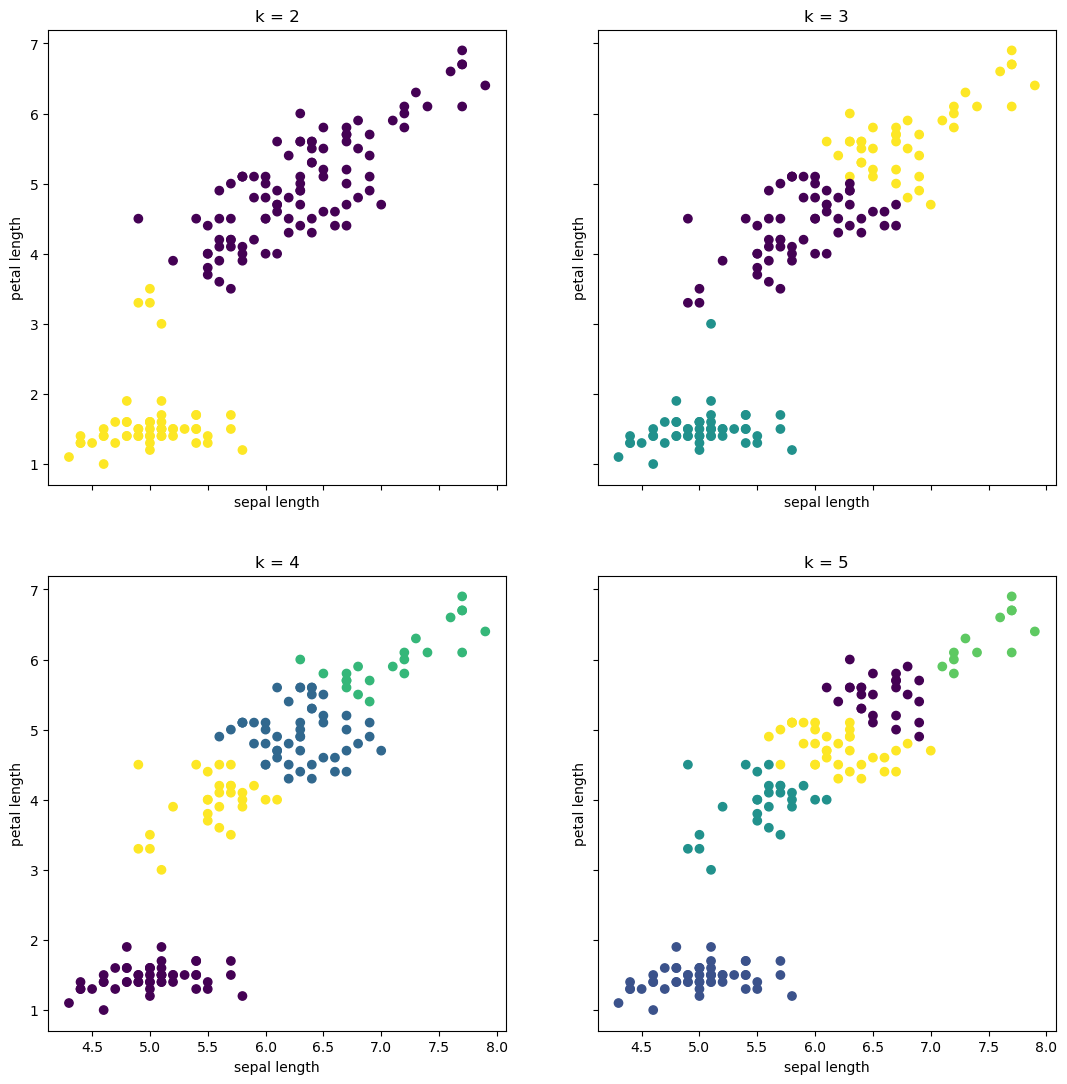

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

We'll note several things in the above visualizations (pretending we don't know the "correct" answer that k should be 3):

- It looks like there are 2 main groups in the plot, so k = 2 could be a reasonable choice.
- When k = 2 or k = 3, there are several points that look like they should be in the bottom left cluster that aren't.
- When k = 4, the bottom left cluster is fully seperated.
- It doesn't look like a k of 5 is much more useful than a k of 4.

Based on these observations, and the elbow method visualization above, we might decide to use 4 clusters.

## Further Reading
- [DBSCAN Clustering](https://ds.codeup.com/clustering/dbscan/)
- [Hierarchical Clustering](https://ds.codeup.com/clustering/hierarchical/)
- [Wikipedia: The elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))
- [Wikipedia: Determining the number of clusters in a dataset](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)
- [scikit-learn User Guide: KMeans](https://scikit-learn.org/stable/modules/clustering.html#k-means)

## Exercises

Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository.

1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.
    
    1. Choose features other than the ones used in the lesson.
    1. Visualize the results of your clustering.
    1. Use the elbow method to visually select a good value for `k`.
    1. Repeat the clustering, this time with 3 different features.

1. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

1. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.  
    

**Bonus**  
1.  Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing  
1. Visualize the data and guess the number and shape of the clusters.  
1. Implement the KMeans algorithm on unscaled data and visualize the clusters.  
1. Repeat the step above but with scaled data.    
1. Write down the takeaways from this exercise.